# Zuber Ride-Sharing Analysis

# Introduction

We will be working to explore ride-sharing data for a new ride-sharing company called Zuber. Previously I scraped data from a website regarding hourly weather conditions, and used SQL to query data from the Zuber database. 

We have a dataset containing the number of trips for each taxi company on November 15-16, 2017, along with a dataset containing the average number of rides that ended in each Chicago neighborhood in November 2017. We will explore this data to identify top dropoff neighborhoods and taxi companies and draw general conclusions based on what we find through graphs. 

We also have a dataset that we queried from the Zuber database using SQL, containing hourly weather conditions and ride durations. We will statistically test whether or not the average duration of rides from the Loop to O'Hare National Airport is the same on Saturdays with rainy weather as it is on clear Saturdays.

In [134]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

# EDA

In [85]:
# Import first datasets

try:
    trips_amount = pd.read_csv('moved_project_sql_result_01.csv')
except:
    trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')

try:
    dropoff = pd.read_csv('moved_project_sql_result_04.csv')
except:
    dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')

## Preprocessing

Let's look at the tables themselves, check datatypes, and make sure values are reasonable.

### trips_amount preprocessing

In [86]:
trips_amount.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [14]:
trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [15]:
trips_amount.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [28]:
trips_amount.duplicated().sum()

0

The numbers of trips are integers, which is ideal. The numbers of trips range from 2 trips per company to nearly 20,000 trips per company, which seems realistic. There are no null values and no duplicates.

### dropoff preprocessing

Now let's do the same for the dropoff table.

In [16]:
dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [18]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


It makes sense that the average number of dropoffs is of float type, and this tells us that the values are all numbers, but I will change these to integers for greater ease of use.

In [23]:
dropoff.average_trips = dropoff.average_trips.astype('int')

In [24]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


In [25]:
dropoff.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


In [29]:
dropoff.duplicated().sum()

0

We changed the average numbers of dropoffs to integers, and the average numbers of dropoffs range from 1 to nearly 11,000 which seems reasonable. There are no missing values, nor duplicate entries.

## Exploring the Data

Let's look again at the top 10 neighborhoods in terms of dropoffs.

In [42]:
# The table seems to have been sorted by average trip number already, 
# but let's sort it ourselves to be certain.
top_ten_dropoff = dropoff.sort_values('average_trips', ascending=False).head(10).set_index('dropoff_location_name')
top_ten_dropoff.head(10)

,average_trips
dropoff_location_name,
Loop,10727
River North,9523
Streeterville,6664
West Loop,5163
O'Hare,2546
Lake View,2420
Grant Park,2068
Museum Campus,1510
Gold Coast,1364


It's handy to have this list. Let's make a bar chart to better visualize it.

Text(0.5, 0, 'Neighborhoods')

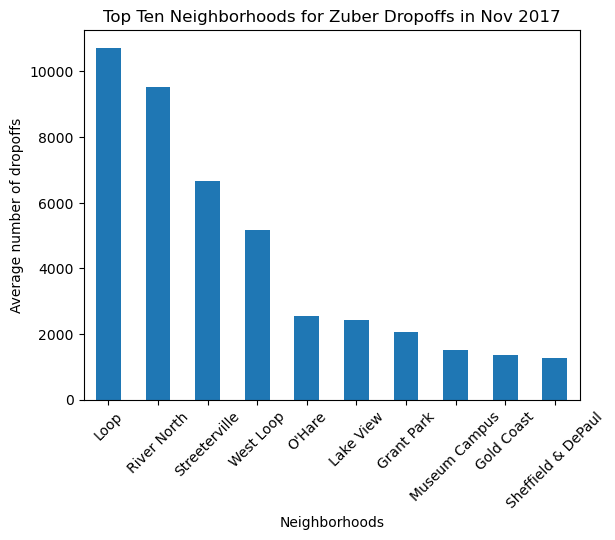

In [50]:
top_ten_dropoff.plot(kind='bar', rot=45, legend=False)
plt.title('Top Ten Neighborhoods for Zuber Dropoffs in Nov 2017')
plt.ylabel('Average number of dropoffs')
plt.xlabel('Neighborhoods')

This chart reveals much more at a glance than our top ten list did. The top four neighborhoods saw significantly more dropoffs in Nov 2017 than the subsequent neighborhoods did. The Loop was the most popular neighborhood, followed by River North, Streeterville, and West Loop. These neighborhoods are some of the most popular neighborhoods in Chicago compared to the others, and are relatively central, so it is reasonable that these would encounter the most dropoffs.

Let's now look at a bar chart of taxi companies and the number of rides each company gave for Nov 15-16, 2017. There are quite a few companies, so let's look at the top 10 of these as well.

In [78]:
top_ten_companies = trips_amount.sort_values(by='trips_amount', ascending=False).head(10).set_index('company_name')
top_ten_companies

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasin,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


Text(0.5, 1.0, 'How many rides did each taxi company give Nov 16-17, 2017?')

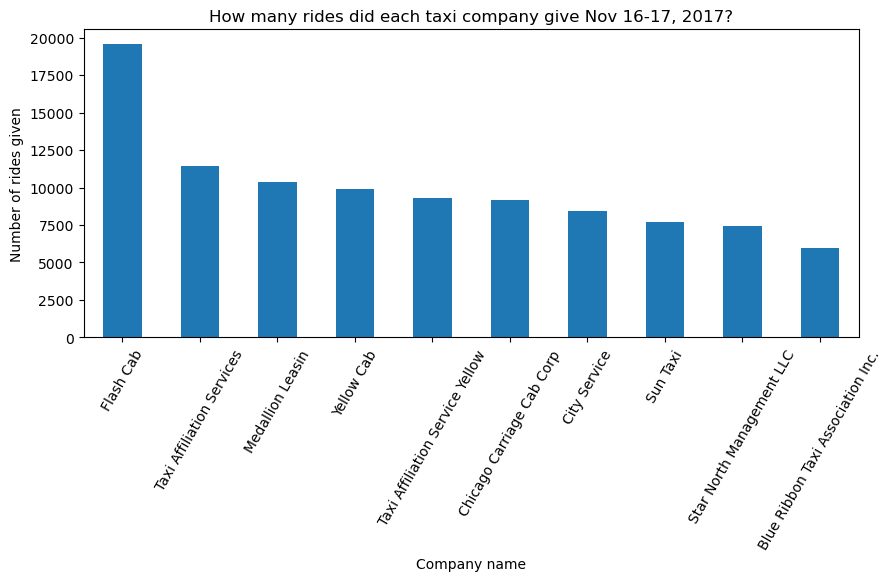

In [81]:
top_ten_companies.plot(kind='bar', rot=60, figsize=(10,4), legend=False)
plt.xlabel('Company name')
plt.ylabel('Number of rides given')
plt.title('How many rides did each taxi company give Nov 16-17, 2017?')

On Nov 16-17, 2017, Flash Cab gave the most rides by far with about 20,000 - nearly double the next company, Taxi Affiliation Services. Taxi Affiliation Services and subsequent companies do not have any great differences with regards to the number of trips they gave. 

# Statistical Testing

Let's now test whether there is the significant difference between the average duration rides from the Loop to O'Hare Internation Airport on rainy Saturdays vs clear Saturdays. We will use a t-test for independent samples.

In [120]:
# Import weather dataset
try:
    weather_records = pd.read_csv('moved_project_sql_result_07.csv')
except:
    weather_records = pd.read_csv('/datasets/project_sql_result_07.csv')

In [164]:
# Check out the table
weather_records.head()

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


In [122]:
# Check datatypes and for missing values
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Let's turn the timestamps from objects into proper datetimes, and then add a column indicating day of the week. The days should all be Saturdays, but I'd like to verify this.

In [123]:
weather_records.start_ts = pd.to_datetime(weather_records.start_ts, format='%Y-%m-%dT%H:%M:%S')

In [124]:
weather_records['day_of_week'] = weather_records.start_ts.dt.dayofweek

In [125]:
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   day_of_week         1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.5+ KB


Let's see - are all days Saturdays? I.e. day of the week number 5.

In [126]:
weather_records.day_of_week.unique()

array([5], dtype=int64)

Perfect, every day in the dataframe is from a Saturday.

Let's take data slices for trips with good weather and trips with bad weather.

In [158]:
rainy_trips = weather_records.duration_seconds[weather_records.weather_conditions == 'Bad']
clear_trips = weather_records.duration_seconds[weather_records.weather_conditions == 'Good']

I want to quickly look at the trip duration means and distributions for these two data slices.

In [160]:
rainy_trips.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

In [161]:
clear_trips.describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Looks like the average trip duration for rainy Saturdays is greater in Nov 2017 than that for clear Saturdays. And the standard deviations are similar, so we can set the variance as equal when we run the t-test.

Let's look at histograms to check for normality.

Text(0, 0.5, 'Number of trips')

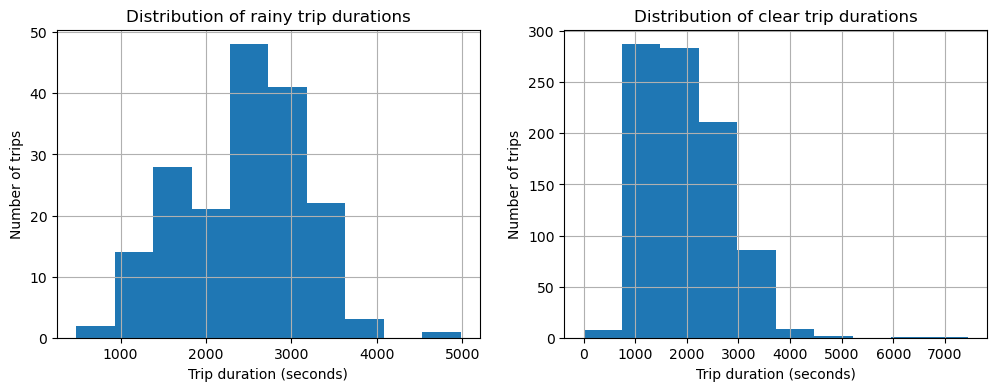

In [162]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
rainy_trips.hist()
plt.title('Distribution of rainy trip durations')
plt.xlabel('Trip duration (seconds)')
plt.ylabel('Number of trips')

plt.subplot(1,2,2)
clear_trips.hist()
plt.title('Distribution of clear trip durations')
plt.xlabel('Trip duration (seconds)')
plt.ylabel('Number of trips')

Both samples seem mostly normally distributed, and the samples are much larger than 50, so normality is less strict of a requirement regardless.

We will test a null hypothesis that the mean trip duration is the same for rainy Saturdays as it is for non-rainy Saturdays. The alternative hypothesis would be that the mean trip durations are different. We will set our alpha to 0.05 so that we can be confident in catching trends, as opposed to a lower alpha which may be too strict and lead to more false negatives.

In [163]:
st.ttest_ind(rainy_trips, clear_trips, equal_var=True)

Ttest_indResult(statistic=6.946177714041499, pvalue=6.517970327099473e-12)

The p-value is extremely low, which allows us to firmly reject the null hypothesis that the mean trip durations for rainy Saturdays and clear Saturdays are equivalent. Trips definitely do appear to take longer when it is raining. 

# Conclusion

 We looked at datasets to find the taxi companies with the most rides on Nov 15-16, 2017. Flash Cab had the most rides by a wide margin, with the subsequent taxi companies being far behind. We also looked at the top neighborhoods for dropoffs in November 2017 and found that the Loop, River North, Streeterville, and West Loop were the most popular neighborhoods.
 
 We then compared the mean trip durations for rainy Saturdays vs clear Saturdays for trips from the Loop to O'Hare National Airport for November 2017, and found a statistically significant difference - rainy Saturdays do tend to have longer trip durations than clear Saturdays.
 
 Prior to this portion of the project, I practiced getting data from a website and writing SQL queries to pull data from a database. In this portion, I got more practice making visualizations and using statistical testing.